<a href="https://colab.research.google.com/github/hakyoonlarrysong-blip/DPI681/blob/main/Copy_of_N_grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Science and Societal Implications of Generative AI**
# Small Language Models: $N$-grams

This notebook contains **6** **exercises** (4 coding and 2 conceptual). Please do consult PingPong and the teaching staff as needed for help--happy learning! 🤓

## **Getting started**

Before you start, create a copy of this Jupyter notebook in your own Google Drive by clicking `Copy to Drive` in the menubar.
If you do not do this your work will not be saved!

Remember to save your work frequently by pressing command-S/control-S or clicking File > Save in the menubar.

We recommend completing this problem set in Google Chrome.

**One small note about coding Python:** Python is *super* picky about indentation in code. To avoid issues, make sure that the code you write is at the same identation level of the comments that indicate where to type your code. In other words, **DO** this:

```
def my_function():
  # BEGIN YOUR CODE =============================
  my_string = "python is annoyingly picky about indentation"
  # END YOUR CODE ===============================
```
and **NOT** this:

```
def my_function():
  # BEGIN YOUR CODE =============================
    my_string = "python is annoyingly picky about indentation"
  # END YOUR CODE ===============================
```

**OR** this:

```
def my_function():
  # BEGIN YOUR CODE =============================
my_string = "python is annoyingly picky about indentation"
  # END YOUR CODE ===============================
```


Run the cell below to load the Python libraries that we will need.

In [ ]:
from collections import defaultdict
import random
import requests

## **Background**

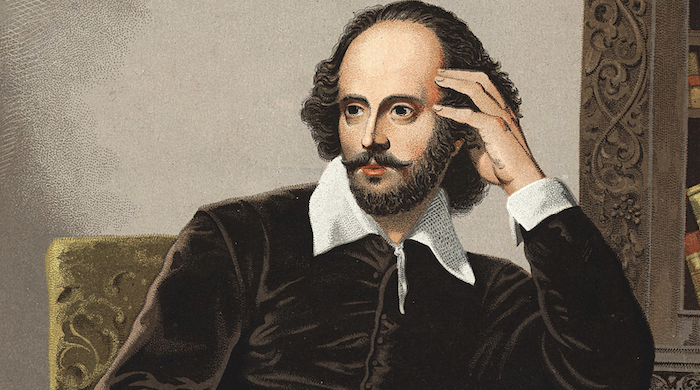

In this notebook, we will walk you through how to train your very own $n$-gram model, specifically a bigrams model (i.e., when  $n$=2 ). Recall that an  $n$-gram model predicts the next word in a sentence based on the few words before it by looking at patterns in how words come together. We will be walking through each step of this process--from pre-processing the textual data we use for our $n$-gram model, to actually generating strings of text.

For our training data, we will be using *The Complete Works of William Shakespeare*, pulled directly from [Project Gutenberg.](https://www.gutenberg.org/) This means that our  $n$-gram model is going to sound a lot like Shakespeare! If you're interested in extending this model, playing around with different training corpuses (like Moby Dick or Frankenstein) from [Project Gutenberg.](https://www.gutenberg.org/) could be a fun thing to try.

## **Load the corpus**

Run the cell below to load the corpus of text that we'll use to build and train our $n$-gram model.

In [ ]:
# Load data
corpus_url = "https://www.gutenberg.org/cache/epub/100/pg100.txt"
corpus = requests.get(corpus_url).text.lstrip('\ufeff')

# Let's take a peak at the first 500 characters of our data to make sure everything loaded correctly
print(corpus[0:500])

## **Step 1: Tokenize the corpus**

**What we want to do:** We want to write a function that takes a piece of text and splits it into individual words (tokens). This step will enable us to compute counts of how often one word follows another word or a given sequence of words.

**How we're going to do it:** Python has a handy function called `split()` that separates text wherever it finds spaces, producing a list of all the individual tokens in the text.

**Exercise 1:** Using [PingPong](https://pingpong.hks.harvard.edu/class/13?assistant=12) to familiarize yourself with how to use the `split()` function, complete the function below (only where indicated) so that `tokens` contains a list of the tokens of `text`. (Hint: the solution only requires one line of code!)

In [ ]:
def tokenize(text):
    """Simple tokenizer: split the text into tokens based on whitespace."""
    # BEGIN YOUR CODE =============================

    # END YOUR CODE ===============================
    return tokens

tokens = tokenize(corpus)

In [ ]:
# Sanity Check!
# If your code passes this test, you can move on to the next step :)

# Here, we are checking to make sure that your tokenize() function
# works correctly by looking at the first few tokens of output

my_output = tokens[0:5]
correct_output = ['The', 'Project', 'Gutenberg', 'eBook', 'of']
print(my_output == correct_output)

## **Step 2: Build n-grams**
**What we want to do:** We want to take our list of tokens, `tokens`, and convert the list of single tokens into a list of $n$-grams. This means if $n = 2,$ we're converting our list of tokens into a list of pairs of tokens.

For example, consider this list of tokens: `["wherefore", "art", "thou", "romeo"]`. Converting this list to bigrams would yield the following: `[("wherefore, "art"), ("art", "thou"), ("thou", "romeo")]`.

**How we're going to do it:** For every index `i` in the list of tokens, we will grab the next `n` tokens starting from `i` and group them together as a tuple (you can think of a tuple as a way of creating pairs or groups of things, like strings, in Python). We'll perform this grouping for all possible consecutive word combinations of size `n`.

**Exercise 2:** Fill in the function below (only where indicated) to subset a sequence of $n$ tokens starting from index `i` in the list of tokens. Make sure to save your list of $n$ tokens (a.k.a. your $n$-gram) in a variable called `n_gram`. Ask [PingPong](https://pingpong.hks.harvard.edu/class/13?assistant=12)  for help with how to subset lists in Python using index values. (Hint: You only need one line of code to do this!)

In [ ]:
def build_n_grams(tokens, n=2):
    """
    Build n-grams from a list of tokens.

    Inputs:
    - tokens (list): List of words/tokens from the corpus.
    - n (integer): The size of the n-gram (default is 2 for bigrams).

    Returns:
    - A list of n-grams.
    """
    n_grams = []
    for i in range(len(tokens)-n+1):
      # BEGIN YOUR CODE =============================

      # END YOUR CODE ===============================
      n_grams.append(tuple(n_gram))

    return n_grams

n_grams = build_n_grams(tokens)

In [ ]:
# Sanity Check!
# If your code passes this test, you can move on to the next step :)

# Here, we are checking to make sure that your build_n_grams() function correctly
# combines the individual tokens into bigrams (the default value is n=2)

my_output = n_grams[0:5]
correct_output = [('The', 'Project'), ('Project', 'Gutenberg'), ('Gutenberg', 'eBook'), ('eBook', 'of'), ('of', 'The')]
print(my_output == correct_output)

## **Step 3: Train the n-gram model**

**What we want to do:** We want to take the list of n-grams that we computed in the previous step and write code that counts how many times each word follows a sequence of $n-1$ words. We will then turn those counts into probabilities. This will amount to "training" our $n$-gram model.

Going back to our previous bigrams example, given the following list of bigrams: `[("wherefore, "art"), ("art", "thou"), ("thou", "romeo")]`, we want to compute the probability that `"art"` follows `"wherefore"`, the probability that `"thou"` follows `"art"`, and the probability that `"romeo"` follows `"thou"`.


**How we're going to do it:** We are first going to count how many times each word appears after a given sequence of $n-1$ words. Then, we will compute the probability of each word occurring after that sequence.

**Exercise 3:** Fill in the part of the function below (only where indicated) that computes the probability of observing a given word after a given context. (Hint: You only need one line of code to do this!) Make sure that the probability you compute is stored in a variable called `probability`. Be sure to read the comments in the function to help you understand what the rest of the code is doing. Please feel free to use [PingPong](https://pingpong.hks.harvard.edu/class/13?assistant=12) to help you understand further!

In [ ]:
def train_ngram_model(corpus, n=2):
    """
    Train an n-gram model with the given text.

    Parameters:
    - corpus (string): The corpus of text we're using for our model.
    - n (integer): The size of the n-gram. (Default is bigrams)

    Returns:
    - A dictionary where the key is the n-1 gram context and the value is a
      dictionary of possible next words mapping to their probabilities.
    """
    # These two lines use the code we wrote in steps 1 and 2
    # to tokenize our corpus and build n_grams from it
    tokens = tokenize(corpus)
    n_grams = build_n_grams(tokens, n)

    # This is the data structure we're going to use to map words to
    # contexts and keep track of counts and probabilities
    # If you want to learn more about how this data structure works,
    # explore it further with ChatGPT or PingPong!
    model = defaultdict(lambda: defaultdict(int))

    # In this step, we are looping over each n_gram from our corpus. For
    # each n_gram, we separate the final word from the preceding n-1 words
    # (i.e., the context). We then use our data structure stored in `model`
    # to count each time we see the given word follow the given context.
    for gram in n_grams:
        context, word = gram[:-1], gram[-1]
        model[context][word] += 1

    # In this step, we are going to loop over each context we have stored
    # in our data structure `model` and convert the counts to probabilities.
    for context in model:
        # This line counts the number of time we have observed the context
        total_context_count = float(sum(model[context].values()))
        for word in model[context]:
            # context_word_count is the number of times we have observed `word`
            # follow `context` in the corpus
            context_word_count =  model[context][word]
            # BEGIN YOUR CODE =============================

            # END YOUR CODE ===============================
            model[context][word] = probability

    return model

model = train_ngram_model(corpus)

In [ ]:
# Sanity Check!
# If your code passes this test, you can move on to the next step :)

# Here, we are checking to make sure that you are correctly computing
# the conditional probabilities of observing the next word by checking
# the probability of observing 'art' after 'wherefore'

my_output = model[('wherefore',)]['art']
correct_output = 0.03076923076923077
print(my_output == correct_output)

## 🧠 **Conceptual checkpoint**

**Woohoo!** Congratulations--you have now successfully trained your first $n$-gram model! 🎉 Now we can get to the fun part of using our model to generate fun (albeit, probably slightly nonsensical) strings of text. We'll be exploring how to do this in the next couple steps.

But before we get there, let's pause to check our conceptual understanding of our trained n-gram model.

**Exercise 4:** Consider the distribution for the context, `'SCENE'`, shown below from the bigram model we trained in **Step 3**. How do we interpret this distribution? What does each entry mean? What does it tell us about the corpus? This is a purely conceptual question, and you can type out your answer below, where indicated.

In [ ]:
# Run me!
model[('SCENE',)]

✨ *Enter your response here!* ✨

## **Step 4: Predict the next word**

**What we want to do:** Given a sequence of $n-1$ words (i.e., our context), predict what the next word in the sequence could be.

**How we're going to do it:** We will write a function that looks at the given context (the sequence of $n-1$ words) and uses the probabilities that we computed previously in `model` to sample the next word.

**Exercise 5:** Fill in the part of the function below (only where indicated) that samples the next word from the probability distribution of words observed after the context. Store this value in a variable called `next_word`.

For this step, you'll want to use the function called `choices()` from the Python package called `random`, which you can invoke by calling `random.choices()`. This function accepts a list of items from which to sample, a parameter called `weights` that defines the probability distribution used to sample an item from the list, and an integer called `k` that specifies how many samples you want. Use [PingPong](https://pingpong.hks.harvard.edu/class/13?assistant=12) to help you understand how to use this function. (Hint: By default, `random.choices()` returns a list (even if `k = 1`), so make sure to unpack this single item so that `next_word` is a string and not a list containing that string.)

In [ ]:
def predict_next_word(model, context):
    """
    Predict the next word given the context.

    Parameters:
    - model (dict): The trained n-grams model.
    - context (tuple): The context (n-1 words).

    Returns:
    - A predicted word based on the context.
    """
    # If we have observed this context in our corpus
    if context in model:
        # These are all the words we've seen follow this context
        possible_words = list(model[context].keys())
        # These are the probabilities of seeing these words follow this context
        probabilities = list(model[context].values())
        # BEGIN YOUR CODE =============================

        # END YOUR CODE ===============================
        return next_word
    else:
        return None



In [ ]:
# Sanity Check!
# If your code passes this test, you can move on to the next step :)

# Here, we are checking to make sure that your train_ngram_model works
# correctly (based on a very small corpus) and that it makes the correct
# prediction on an example context.

mini_corpus = "This is sanity check."
mini_model = train_ngram_model(mini_corpus, n = 2)
context = ("sanity",)
my_output = predict_next_word(mini_model, context)
correct_output = "check."
print(my_output == correct_output)

## **Step 5: Generating text**

For this penultimate step, we're going to write a wrapper function that allows us to specify a context and a sequence length, and generate a string of text based on that starting context by making repeated calls to our function `predict_next_word()`. This is not too disimilar from how LLM's like GPT-4 work to generate long strings of text. The main difference is that word models based on $n$-grams are *much* less sophisticated than LLM's like GPT-4...which means our generated text is going to be less impressive. 😅 Also, because our corpus is *The Complete Works of William Shakespeare*, our outputs are going to sound distinctly Elizabethan...

You might, however, try playing around with different corpuses and different values of $n$ to see how this affects the quality of the output of your $n$-gram model.

In [ ]:
def generate_text_sequence(model, initial_context_str, sequence_length, n):
    """
    Generates a sequence of text using an n-grams model, accepting a string as the initial context.

    Parameters:
    - model (dict): The trained n-grams model.
    - initial_context_str (str): The starting context for generating text, as a string.
    - sequence_length (int): The total length of the text sequence to generate, including the initial context.
    - n (int): The size of the n-gram used by the model.

    Returns:
    - str: The generated text sequence.
    """
    # Split the initial context string into words
    initial_context = initial_context_str.split()

    # Ensure there are enough words in the initial context for the model to work
    if len(initial_context) < n - 1:
        raise ValueError(f"The initial context must contain at least {n - 1} words for this n-gram model.")

    generated_words = initial_context
    for _ in range(sequence_length - len(initial_context)):
        # Update context with the last n-1 words
        context = tuple(generated_words[-(n-1):])
        next_word = predict_next_word(model, context)
        if next_word is None:  # Break if the model can't predict a next word
            break
        generated_words.append(next_word)

    # Join and return the generated words as a single string
    return ' '.join(generated_words)

Using this function, we're going to see what kind of (romantic?) Shakespearean text we can generate! We'll seed the the text generation with the context, "My love," and request a sequence of 25 words in total. We'll use the bigrams model we've trained on *The Complete Works of William Shakespeare* throughout this notebook to give our output a bit of Elizabethan flare!

Because we predicted the next word probabilistically in `predict_next_word()`, each run of the cell below will produce a different string!

In [ ]:
# Run me!
initial_context_str = "My love"
sequence_length = 25
n = 2

generated_sequence = generate_text_sequence(model, initial_context_str, sequence_length, n)
print(generated_sequence)

## **Final step: Incorporating temperature** 🔥

For this last step, we're going to introduce the concept of **temperature**. Temperature is a foundational concept in NLP that relates to the randomness of predictions. Specifically, temperature is a parameter used by language models to control the randomness of the output that is generated. We're going to explore temperature with our bigrams model, but temperature is also commonly used by LLMs, like GPT-4.

In the context of $n$-gram models, a temperature of $\tau = 1$ means that we predict words according to the distribution derived during training. In other words, the function that we completed in **Step 4**, `predict_next_word()`, implicitly uses a temperature of $\tau = 1$ because we sample next words according to the word distributions learned from our corpus. A higher temperature (when $\tau > 1$) results in more randomness (and thus more diversity and creativity in the outcomes), while a lower temperature (when $\tau < 1$) makes the model more conservative, meaning the model will just favor predicting the word with the highest probability.

In the cell below, we have written three new functions to implement a version of our bigram model that uses **temperature:**


*   `get_temp_adjusted_dist()`: a function that produces a new word distribution according to a given temperature value $\tau$
*   `predict_next_word_w_temp()`: a function that predicts the next word using the updated probability distribution specified by temperature $\tau$
*   `generate_text_sequence_w_temp()`: a function that generates a sequence of text, much like `generate_text_sequence()`, except now we can specify a temperature value $\tau$ to change the randomness of the output

With these new functions, the most important thing to know and understand is what's going on at a high-level. That's to say, read the code comments and use [PingPong](https://pingpong.hks.harvard.edu/class/13?assistant=12) to ask questions, but don't get bogged down by the mathematical and technical details!



In [ ]:
def get_temp_adjusted_dist(probabilities, temperature):
    """
    Compute the temperature-adjusted distribution.rt
    """
    e_x = [pow(p, 1/temperature) for p in probabilities]
    sum_e_x = sum(e_x)
    new_probabilities = [item / sum_e_x for item in e_x]
    return new_probabilities

def predict_next_word_w_temp(model, context, temperature):
    """
    Predict the next word given the context, with the temperature parameter
    to control randomness of predictions.

    Parameters:
    - model (dict): The trained n-grams model.
    - context (tuple): The context (n-1 words).
    - temperature (float): Temperature parameter to control prediction randomness.

    Returns:
    - A predicted word based on the context and temperature.
    """
    if context in model:
        possible_words = list(model[context].keys())
        # These are the original probabilities learned by our n-grams model:
        probabilities = list(model[context].values())
        # These are the temperature-adjusted ones:
        new_probabilities = get_temp_adjusted_dist(probabilities, temperature=temperature)

        # We use the temperature-adjusted probabilities to sample our next word
        return random.choices(possible_words, weights=new_probabilities)[0]
    else:
        return None


def generate_text_sequence_w_temp(model, initial_context_str, sequence_length, n, temperature):
    """
    Generates a sequence of text using an n-grams model, accepting a string as the initial context.

    Parameters:
    - model (dict): The trained n-grams model.
    - initial_context_str (str): The starting context for generating text, as a string.
    - sequence_length (int): The total length of the text sequence to generate, including the initial context.
    - n (int): The size of the n-gram used by the model.

    Returns:
    - str: The generated text sequence.
    """
    # If we want to use the original distributions learned by the model,
    # we just use our original `generate_text_sequence()` function from before
    if temperature == 1:
      generate_text_sequence(model, initial_context_str, sequence_length, n)
    else :
      # Split the initial context string into words
      initial_context = initial_context_str.split()

      # Ensure there are enough words in the initial context for the model to work
      if len(initial_context) < n - 1:
          raise ValueError(f"The initial context must contain at least {n - 1} words for this n-gram model.")

      generated_words = initial_context
      for _ in range(sequence_length - len(initial_context)):
          # Update context with the last n-1 words
          context = tuple(generated_words[-(n-1):])
          # **** This is where we use our temperature-adjusted predicitons!! ****
          next_word = predict_next_word_w_temp(model, context, temperature)
          if next_word is None:  # Break if the model can't predict a next word
              break
          generated_words.append(next_word)

      # Join and return the generated words as a single string
      return ' '.join(generated_words)

**Exercise 6:** Using the cell below, experiment with generating text using different temperature values. Try using a small temperature value (like $\tau = 0.1$) and a large temperature value (like $\tau = 10$). What do you notice about the output? How does the temperature affect the text that is generated by the model?
This is a purely conceptual question, and you can type out your answer below, where indicated.

In [ ]:
# Run me!
initial_context_str = "My love"
sequence_length = 25
n = 2
temperature = 0.1

print(generate_text_sequence_w_temp(model, initial_context_str, sequence_length, n, temperature))

✨ *Enter your response here!* ✨

## **Exporting your notebook as a PDF**

Once you have completed this problem set, you're ready to submit it as a PDF. Here are the steps that we recommend you do every time you submit a problem set:

1. Click `View > Expand sections` in the menubar to make sure all work is visible (if it is greyed out then it is already visible).
1. Click `Runtime > Run all` in the menubar to make sure all of your code is executed.
1. Click `File > Print` in the menubar and choose the `Save as PDF` option in Chrome to export your notebook as a PDF.
1. Check to make sure answers do not get cut off - when you go to print the PDF we recommend clicking on `More settings` and setting `Margins` to `None`.
1. Submit your file on Canvas.